In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
pd.pandas.set_option('display.max_columns', None)
data_path = 'train.csv'
file_data = pd.read_csv(data_path)
print(file_data.head())

   Id  duration protocol_type service flag  src_bytes  dst_bytes  land  \
0   1         0           tcp   other  REJ          0          0     0   
1   2         0           tcp    http   SF      54540       8314     0   
2   3         0           tcp   other  REJ          0          0     0   
3   4         0          icmp   eco_i   SF          8          0     0   
4   5         0           tcp   other  REJ          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    2                  0          1                1   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shell

0            satan.
1             back.
2            satan.
3          ipsweep.
4            satan.
            ...    
12984        satan.
12985        satan.
12986      ipsweep.
12987      ipsweep.
12988    portsweep.
Name: type_of_attack, Length: 12989, dtype: object


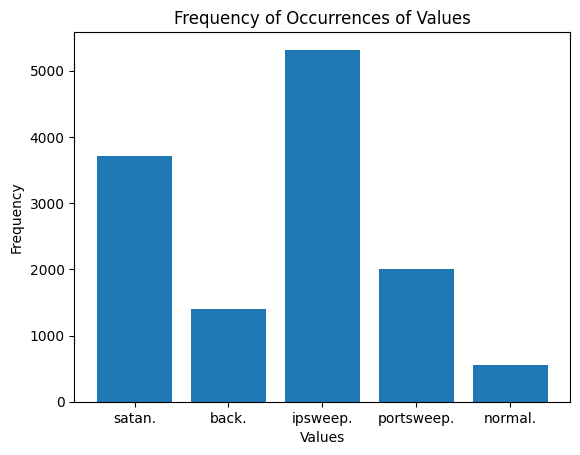

In [28]:
train_data = file_data['type_of_attack']
print(train_data)
counter1 = Counter(train_data)
values1 = list(counter1.keys())
frequencies1 = list(counter1.values())
plt.bar(values1, frequencies1)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Occurrences of Values')
plt.show()

In [29]:
features_na = [feature for feature in file_data.columns if file_data[feature].isnull().sum()>1]
print(features_na)

[]


In [30]:
print(file_data.shape)
file_data = file_data.drop('Id', axis = 1)
print(file_data.shape)

(12989, 43)
(12989, 42)


In [31]:
# NUMERICAL FEATURES
features_num = [feature for feature in file_data.columns if file_data[feature].dtype != 'O']
print(features_num)
print(len(features_num))

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
38


In [32]:
# CATEGORICAL FEATURES
features_cat = [feature for feature in file_data.columns if file_data[feature].dtype == 'O']
print(features_cat)
print(len(features_cat))

['protocol_type', 'service', 'flag', 'type_of_attack']
4


In [33]:
# DISCRETE FEATURES
features_dis = [feature for feature in features_num if len(file_data[feature].unique()) < 25]
print(features_dis)
print(len(features_dis))

['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate']
19


In [34]:
# CONTINUOUS FEATURES
features_cont = [feature for feature in features_num if len(file_data[feature].unique()) >= 25]
print(features_cont)
print(len(features_cont))

['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
19


In [35]:
for feature in features_dis:
    print(feature, len(file_data[feature].unique()))

land 1
wrong_fragment 1
urgent 1
hot 3
num_failed_logins 1
logged_in 2
num_compromised 2
root_shell 1
su_attempted 1
num_root 2
num_file_creations 1
num_shells 2
num_access_files 2
num_outbound_cmds 1
is_host_login 1
is_guest_login 1
srv_serror_rate 10
srv_rerror_rate 20
dst_host_srv_serror_rate 11


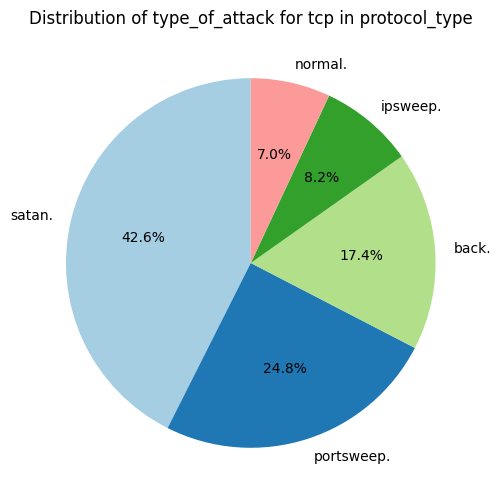

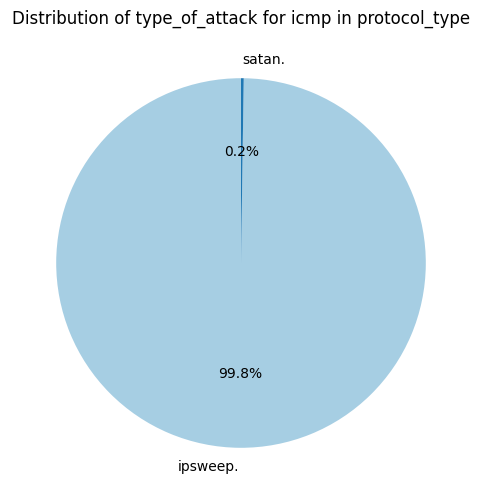

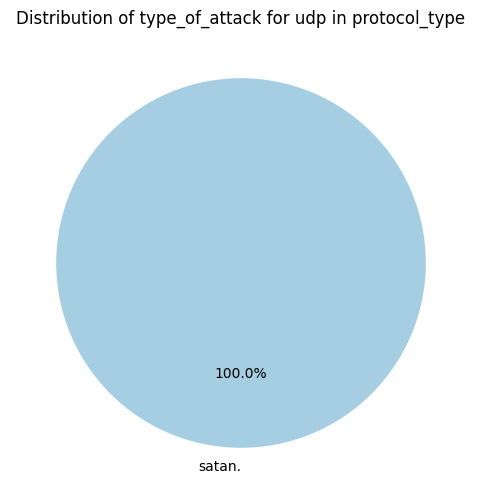

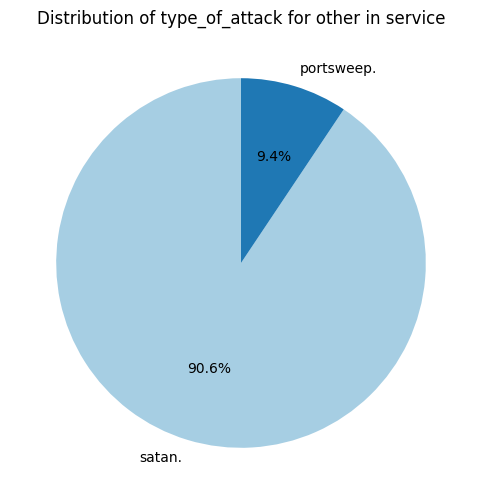

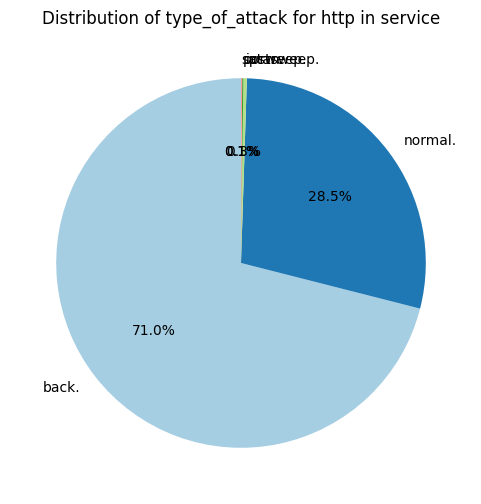

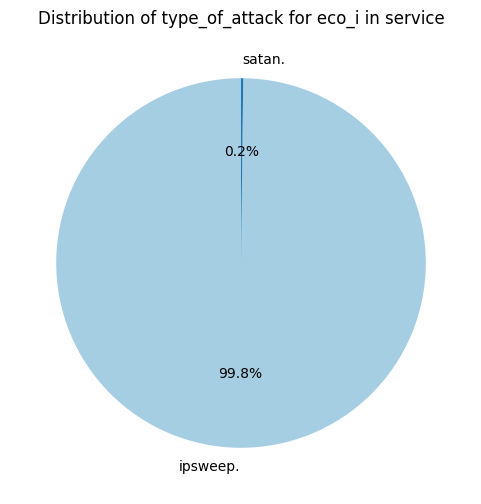

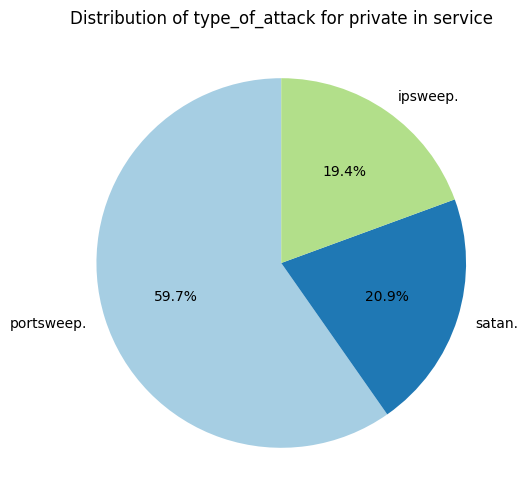

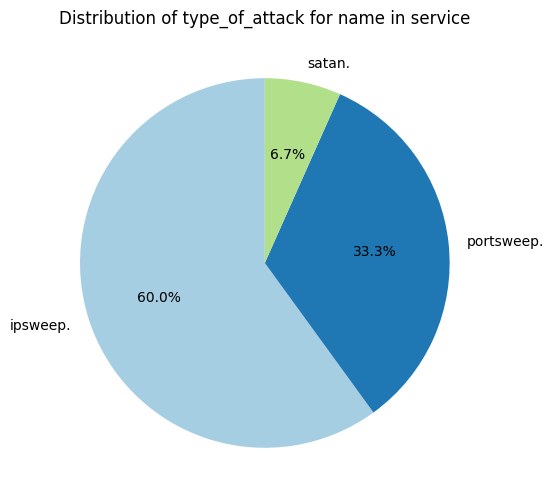

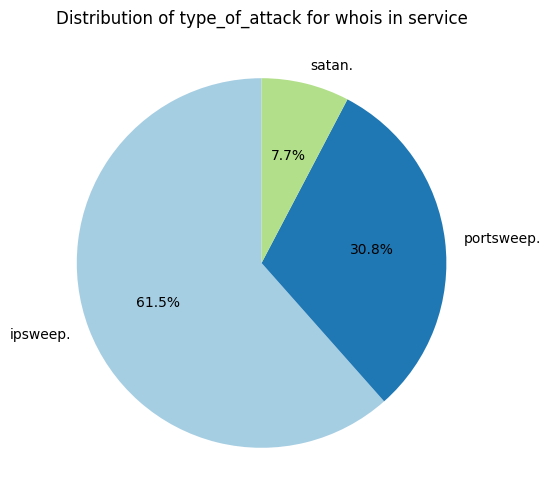

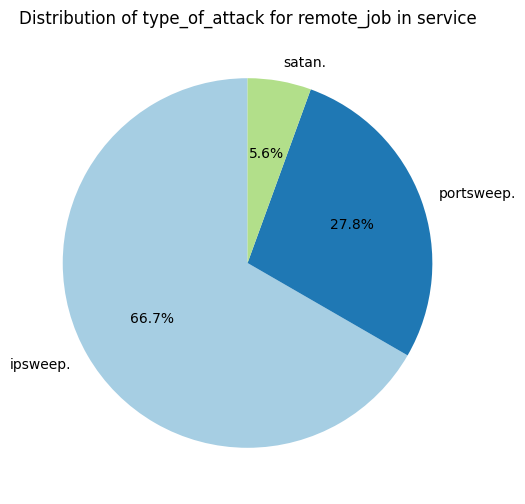

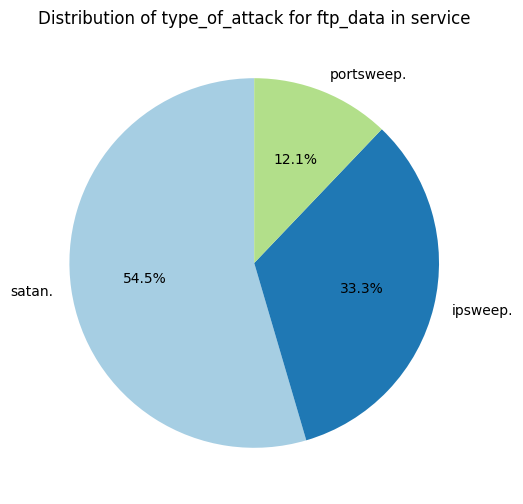

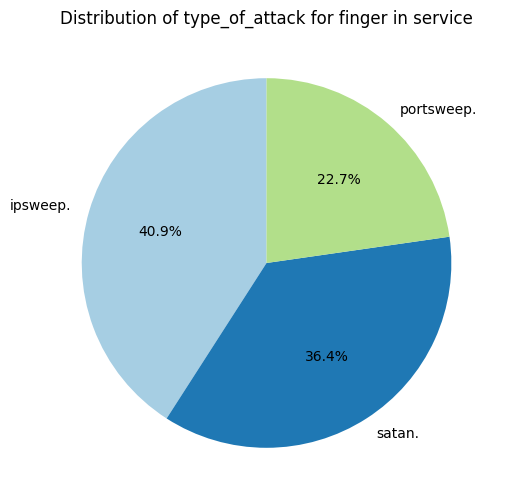

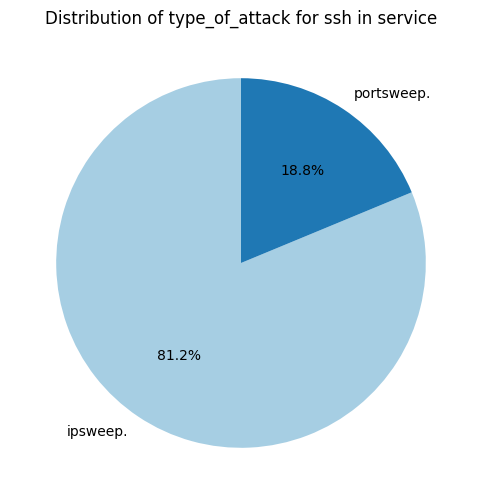

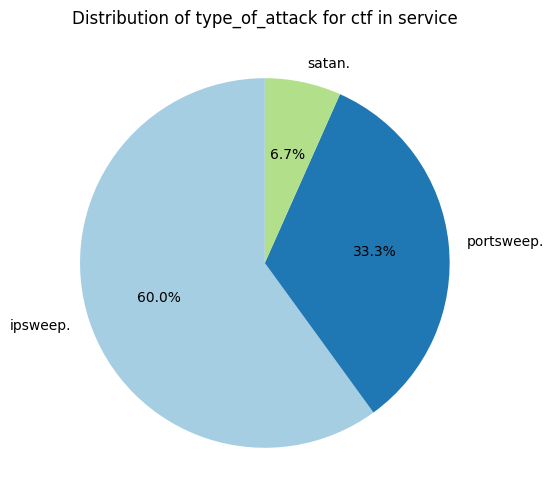

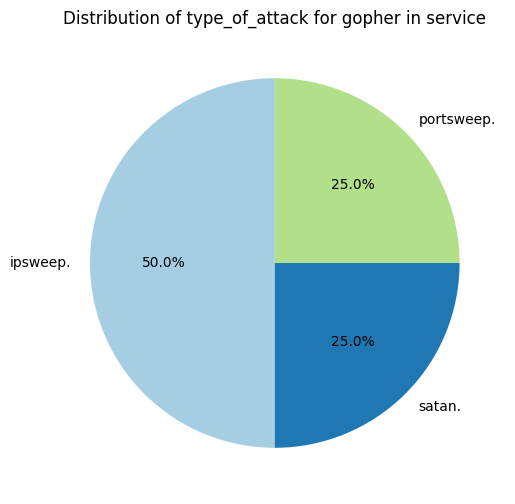

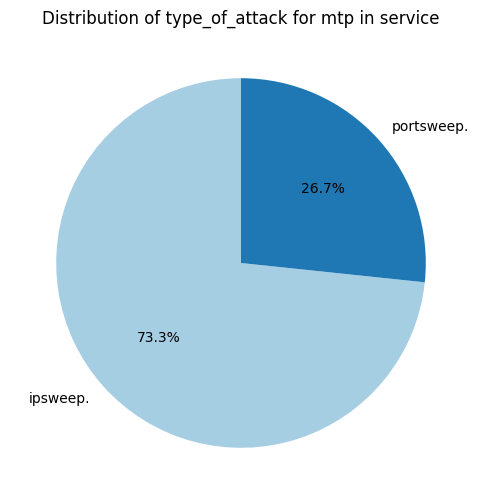

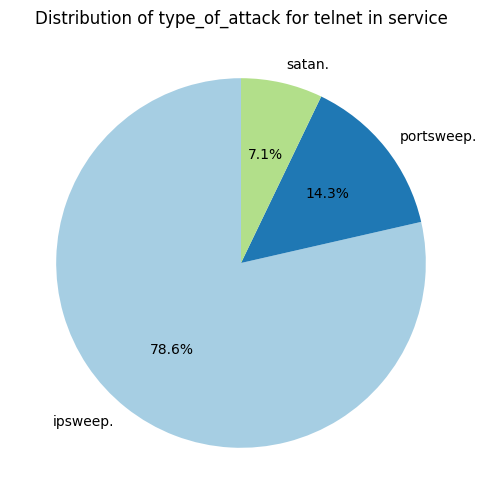

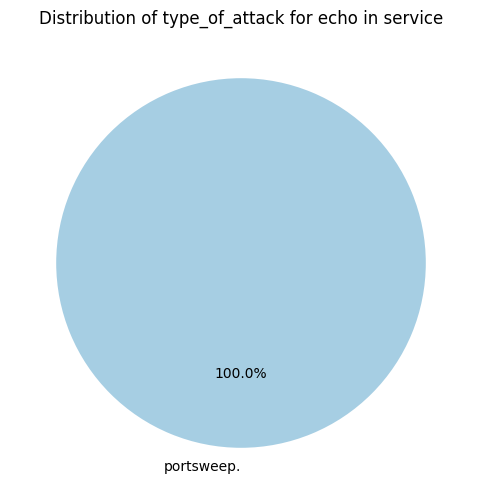

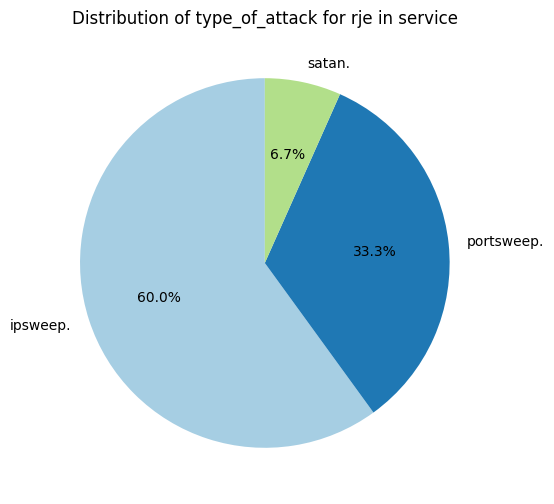

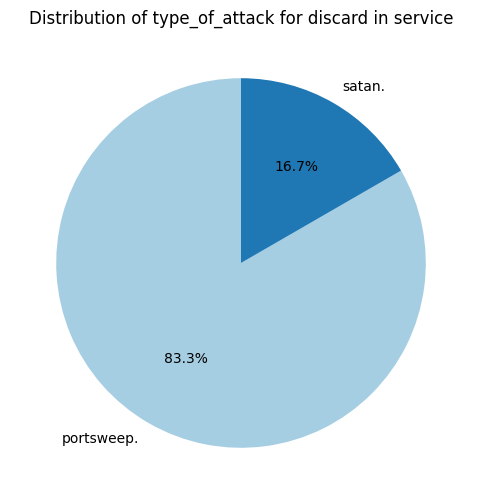

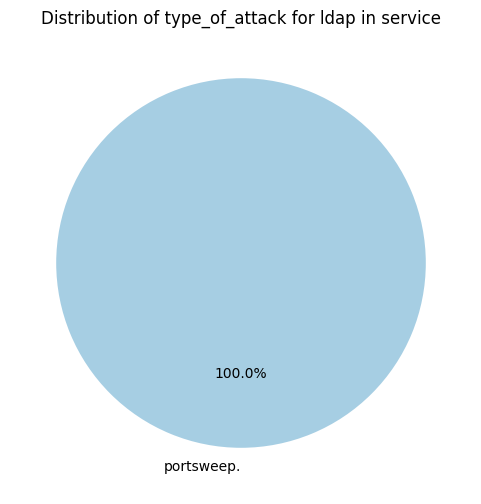

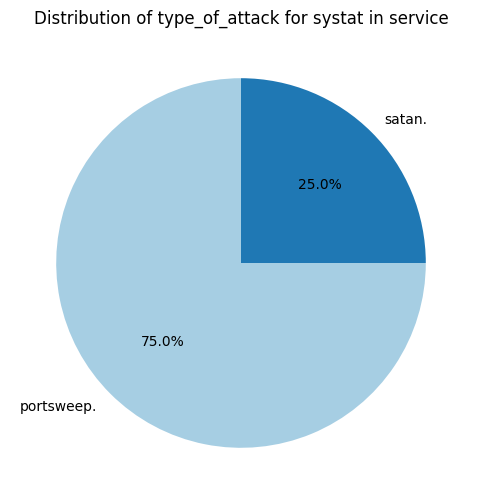

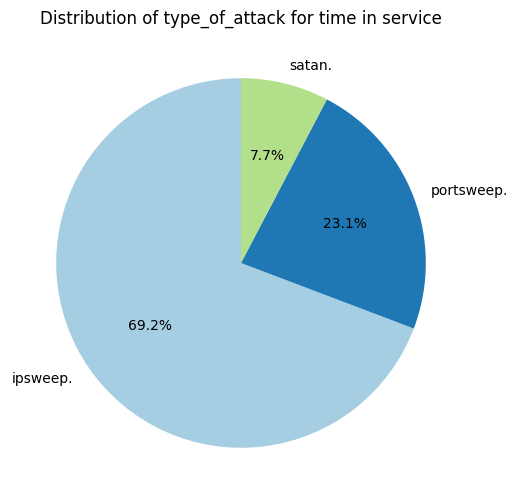

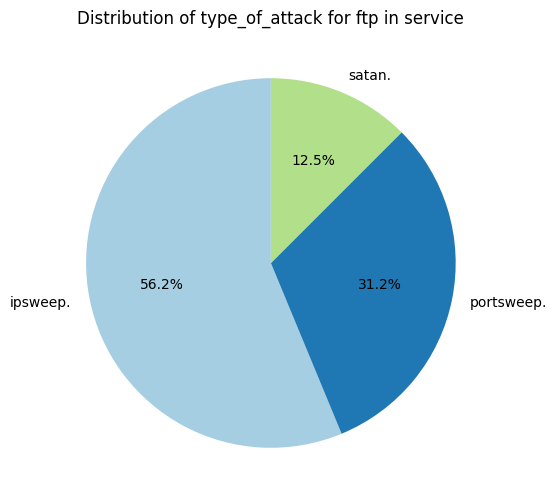

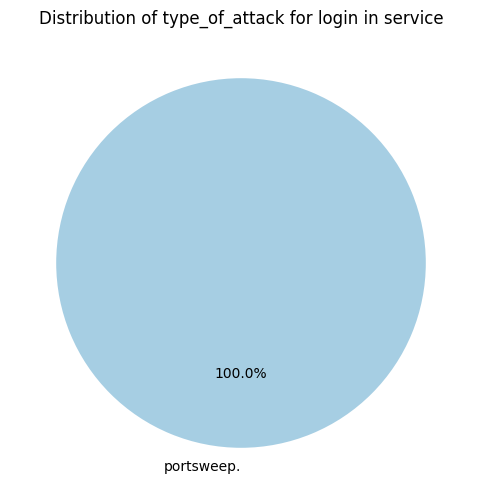

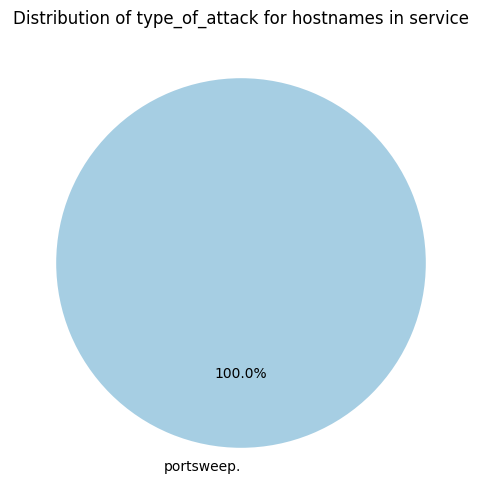

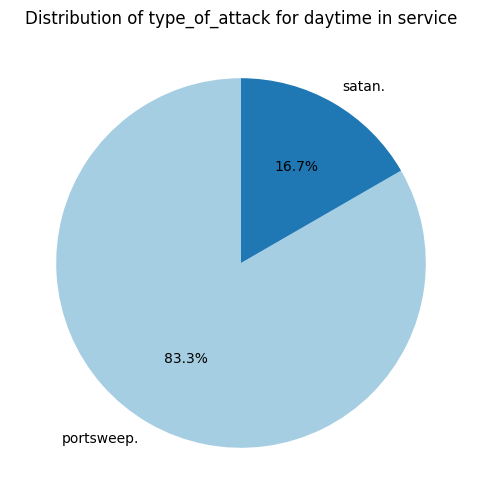

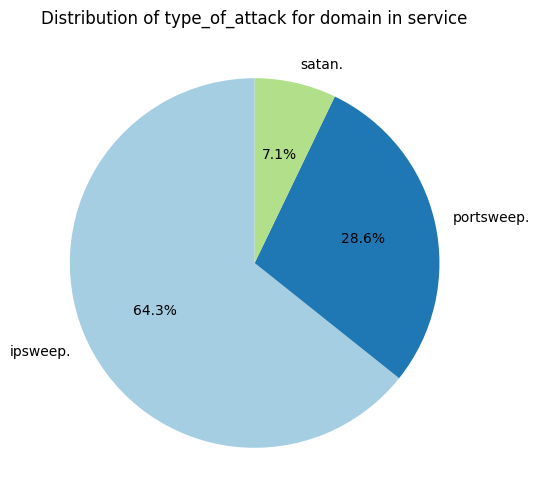

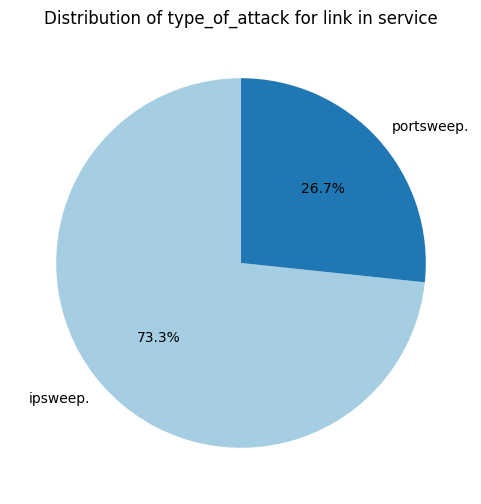

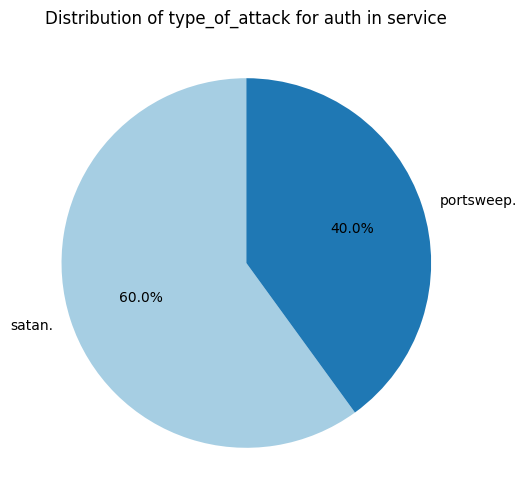

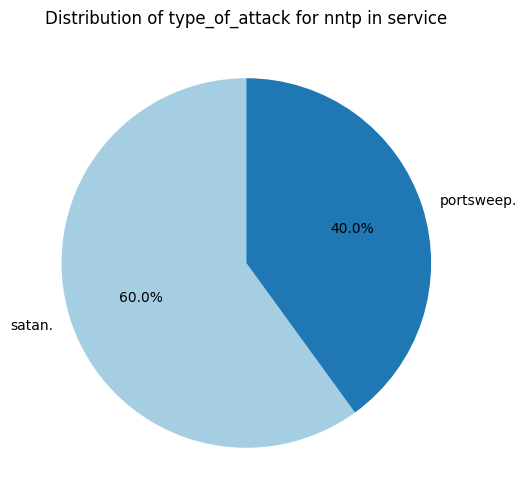

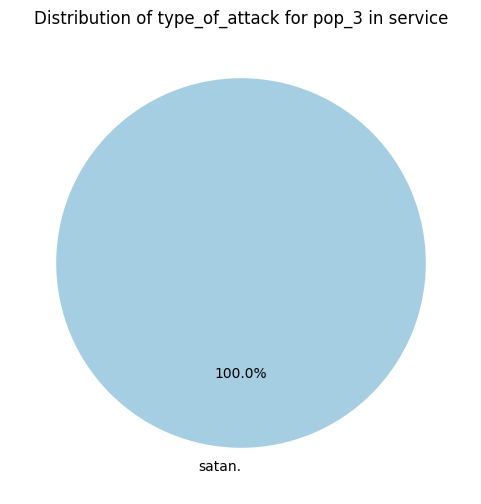

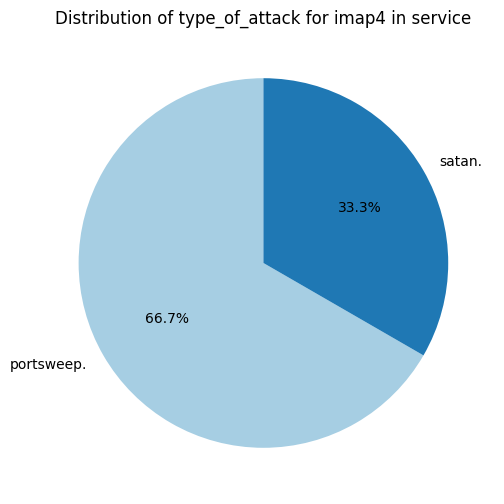

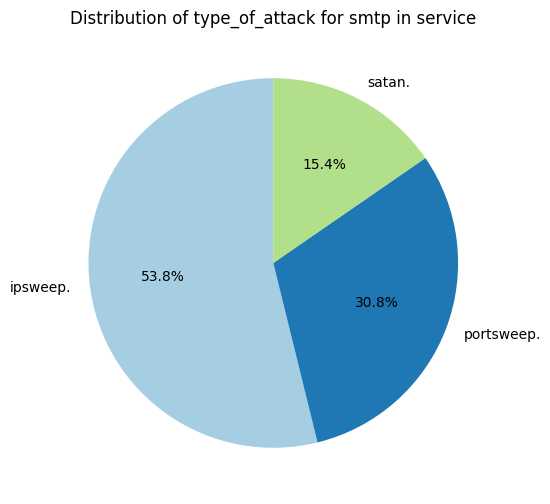

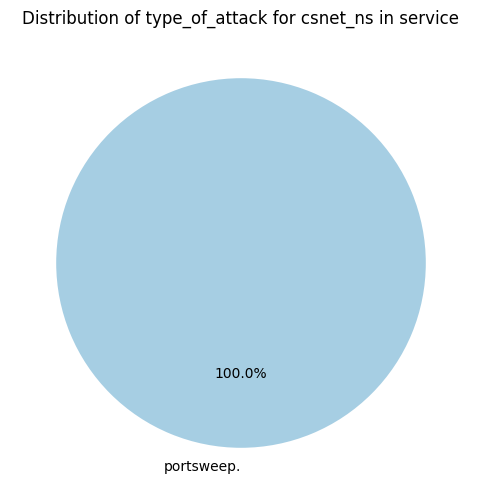

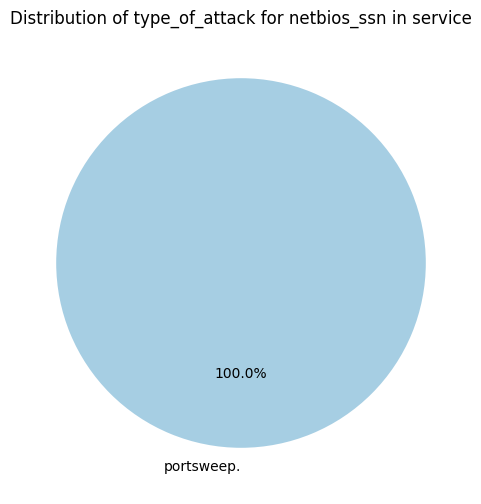

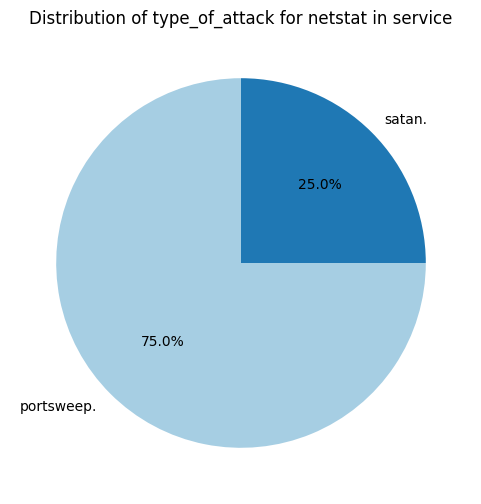

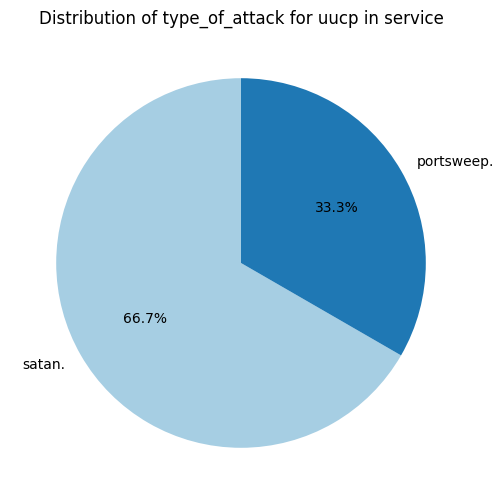

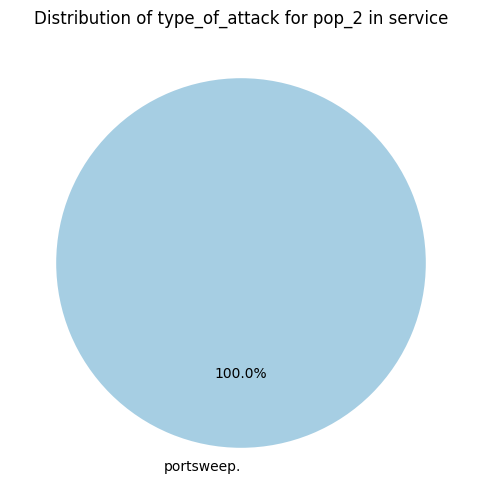

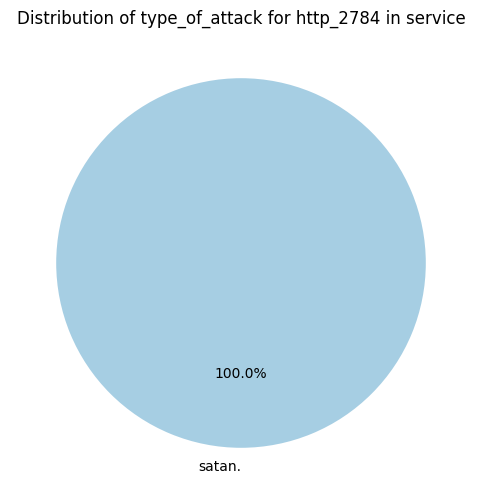

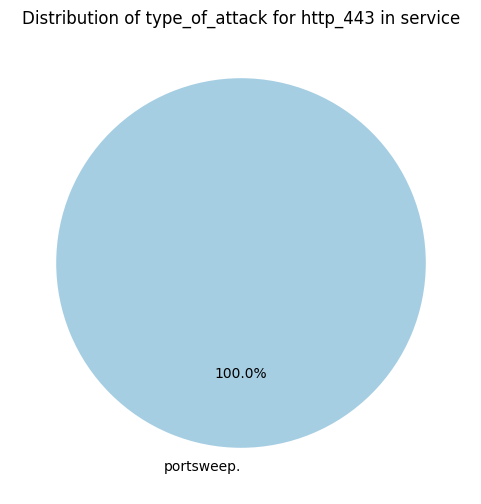

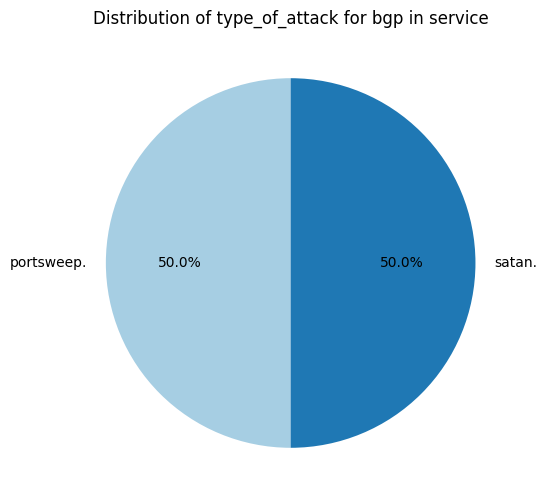

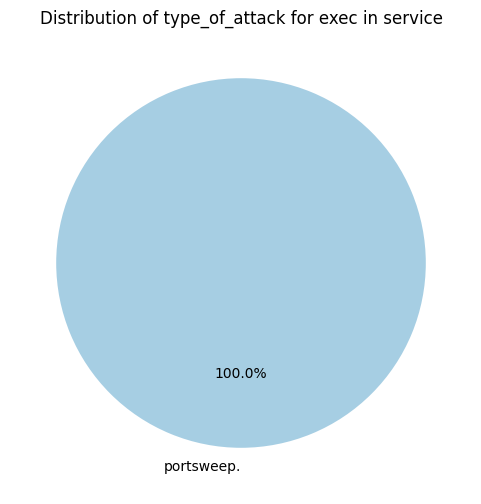

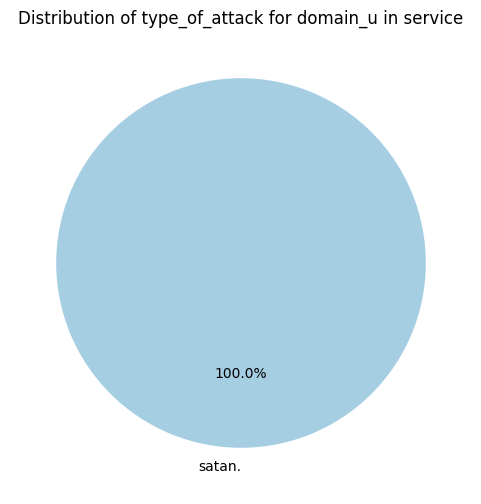

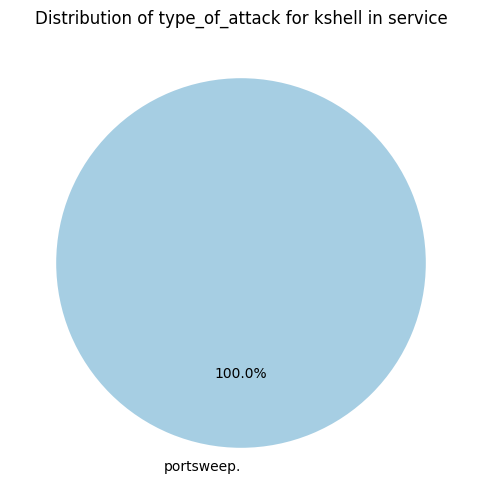

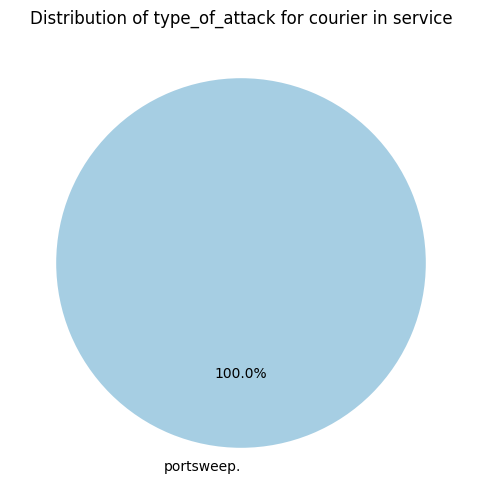

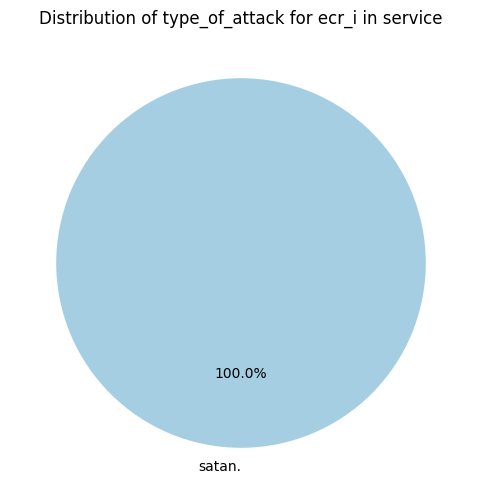

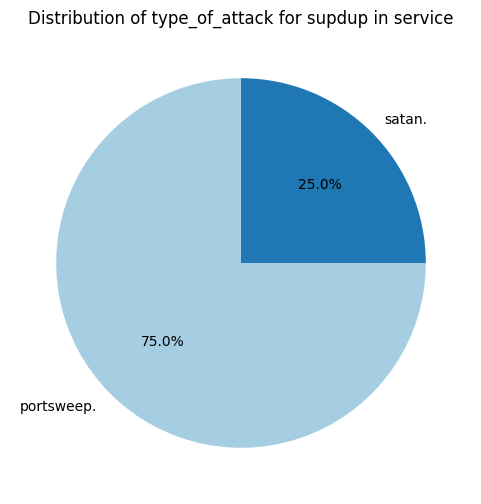

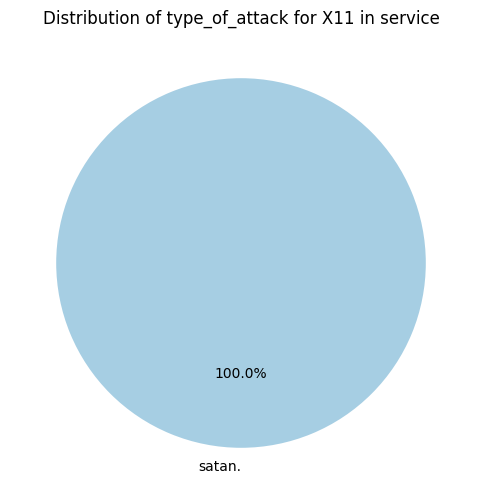

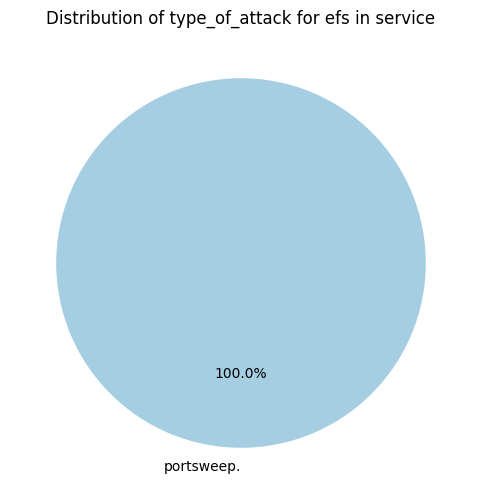

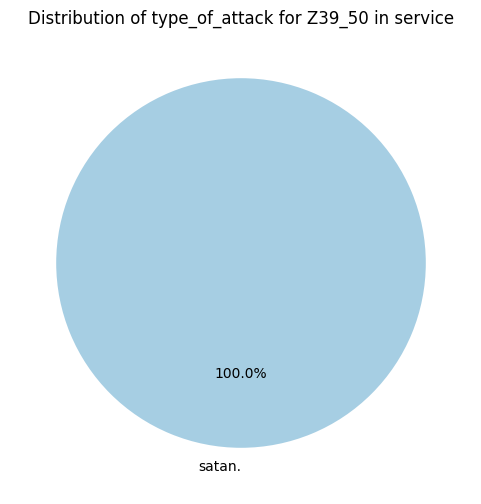

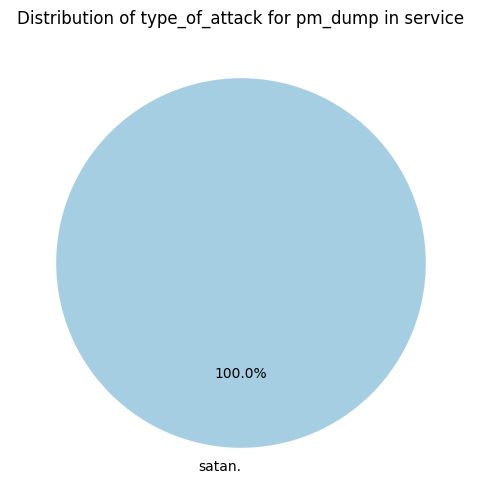

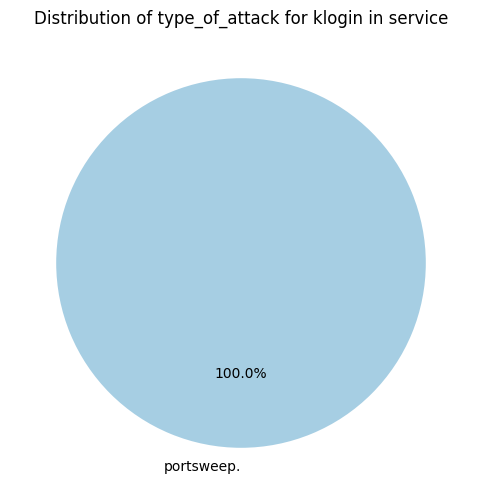

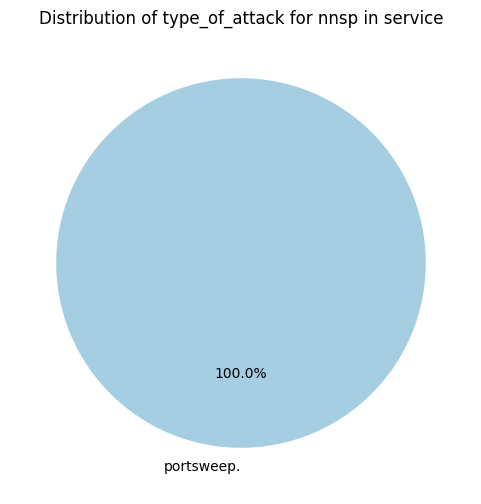

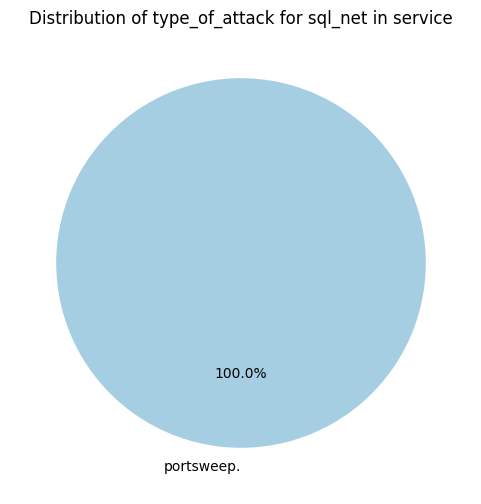

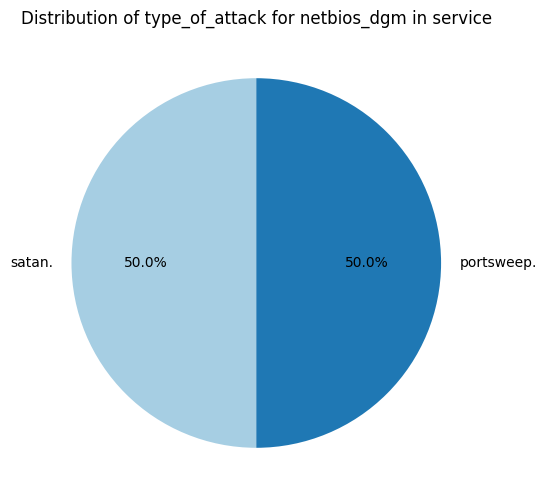

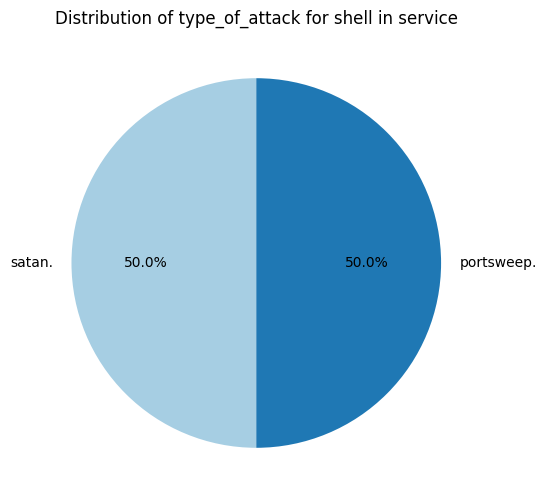

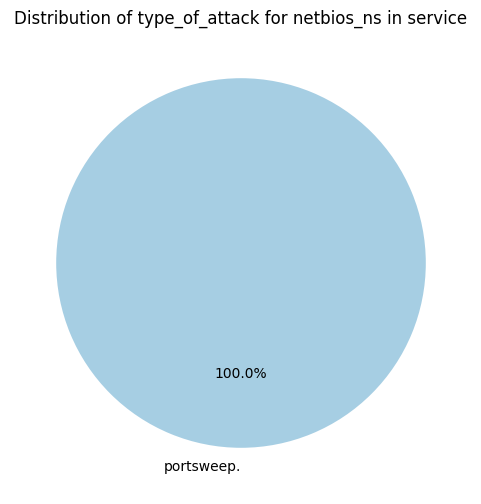

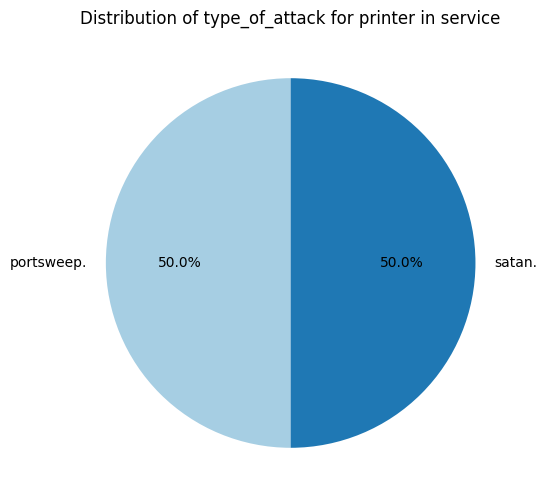

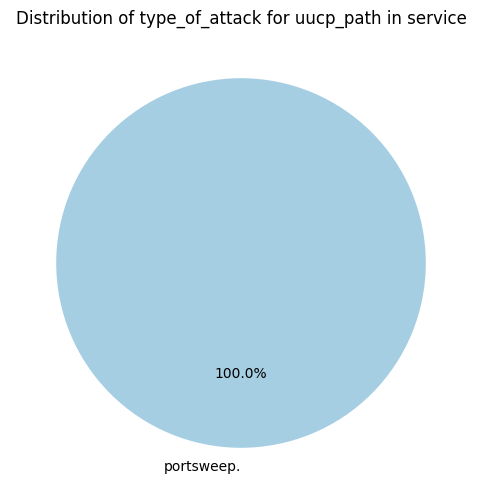

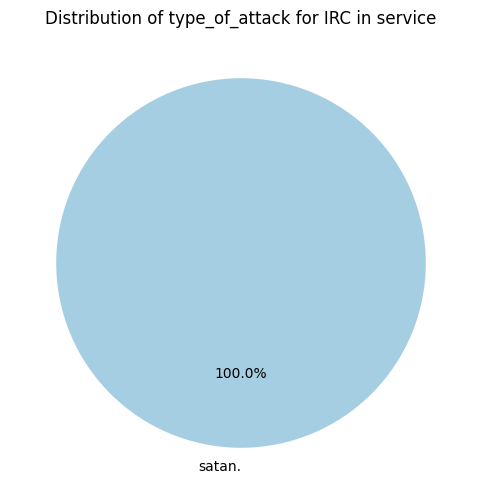

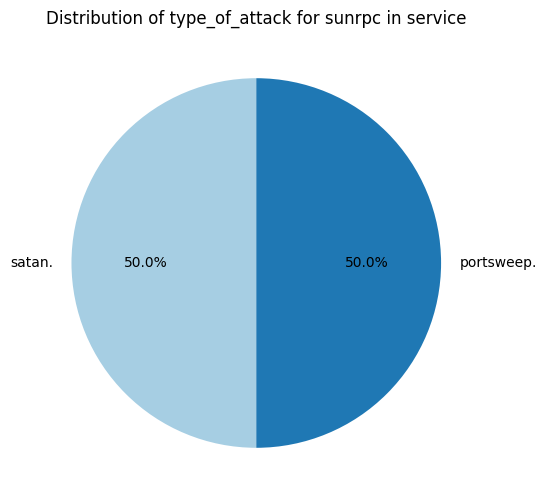

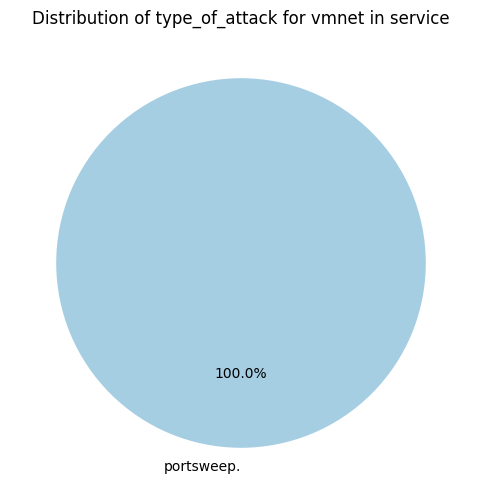

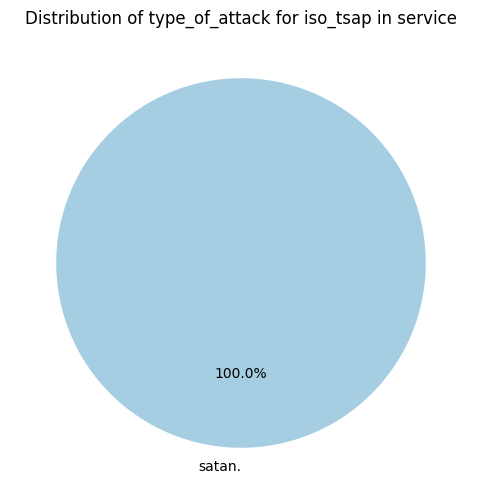

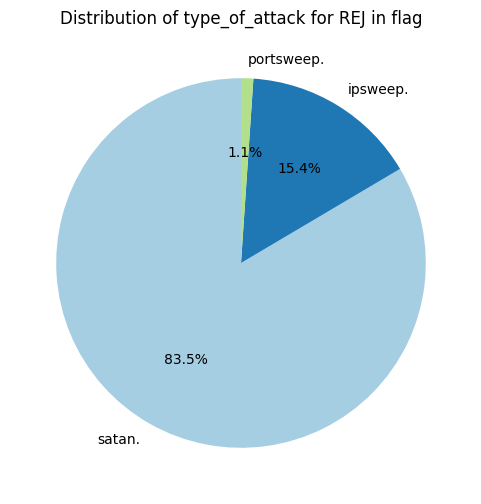

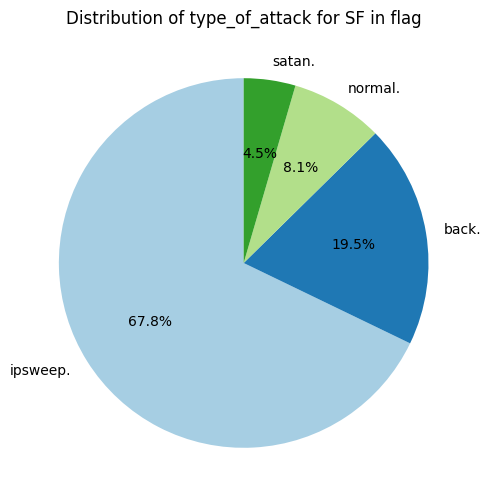

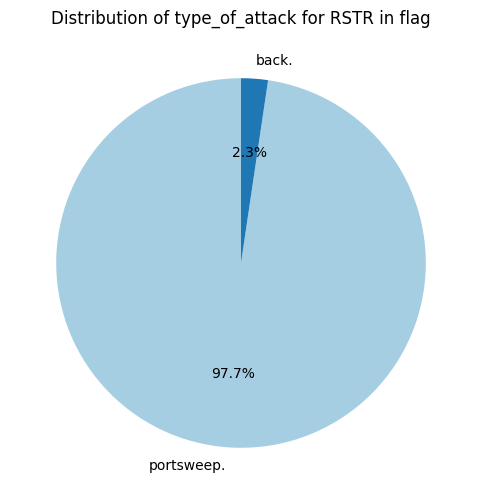

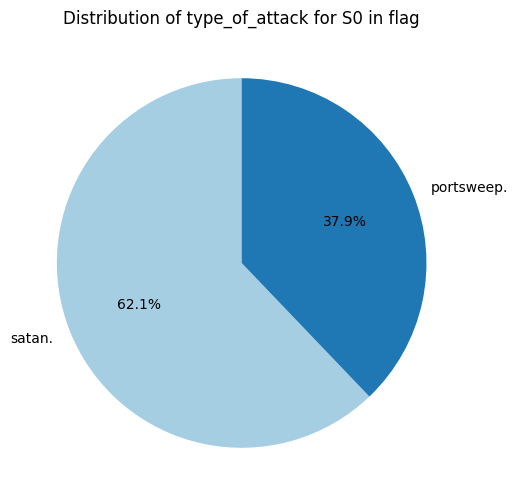

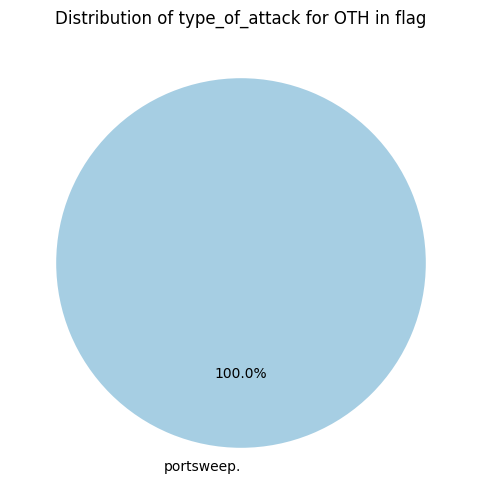

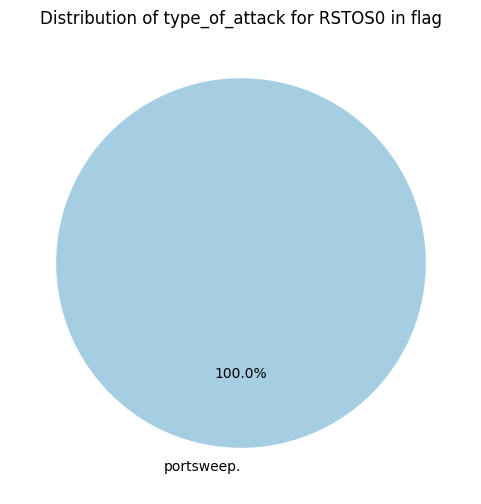

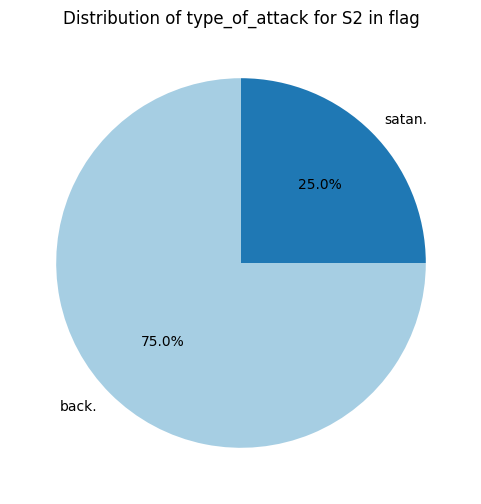

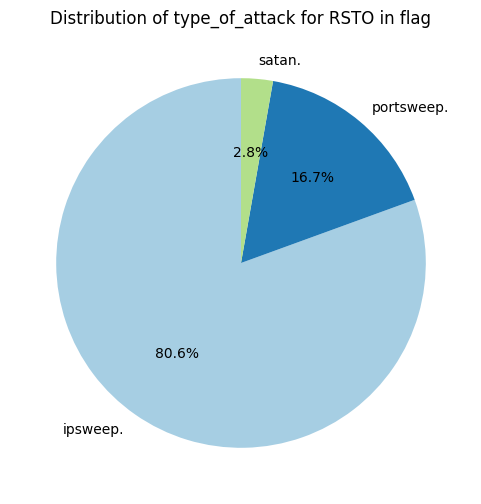

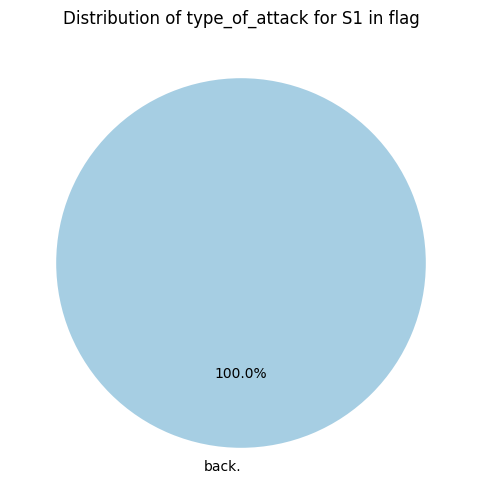

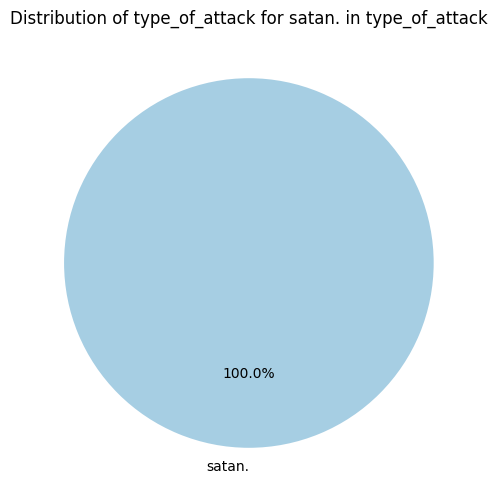

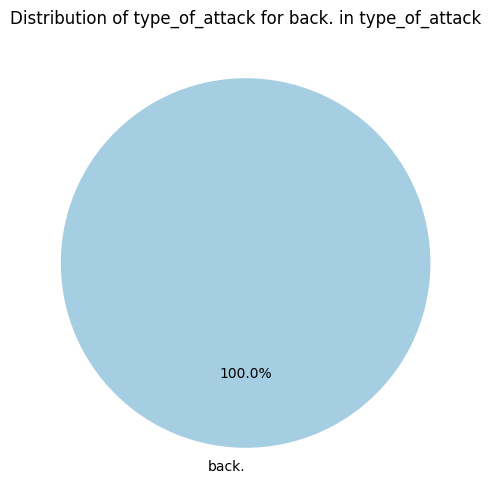

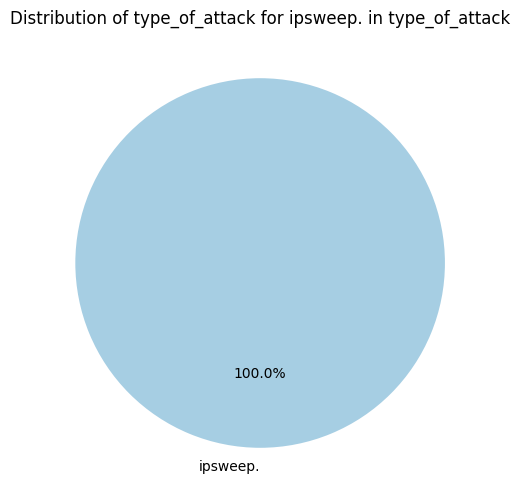

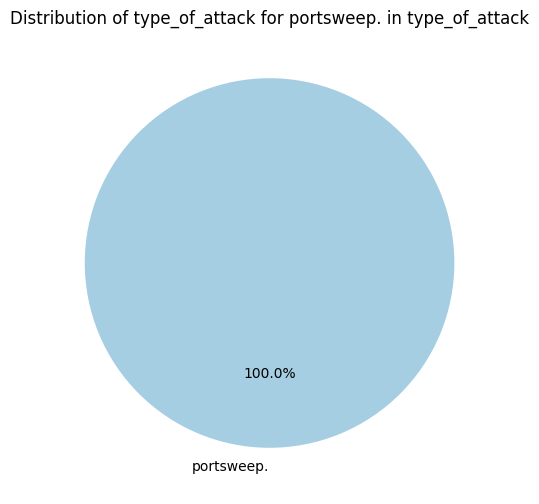

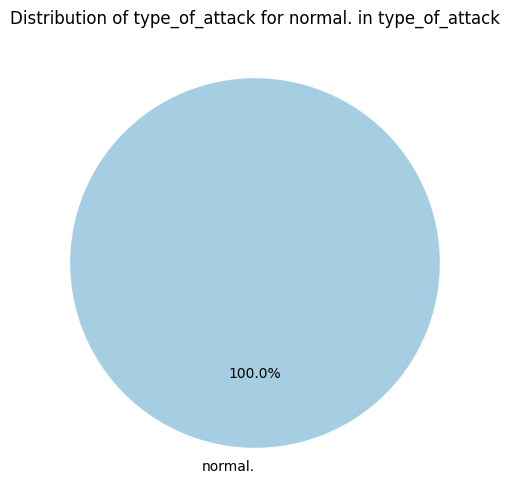

In [23]:
%matplotlib inline
for feature in features_cat:
    data = file_data.copy()
    for category in data[feature].unique():
        attack_counts = data[data[feature] == category]['type_of_attack'].value_counts()
        plt.figure(figsize=(6,6))
        attack_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.ylabel('')
        plt.title(f'Distribution of type_of_attack for {category} in {feature}')
        plt.show()


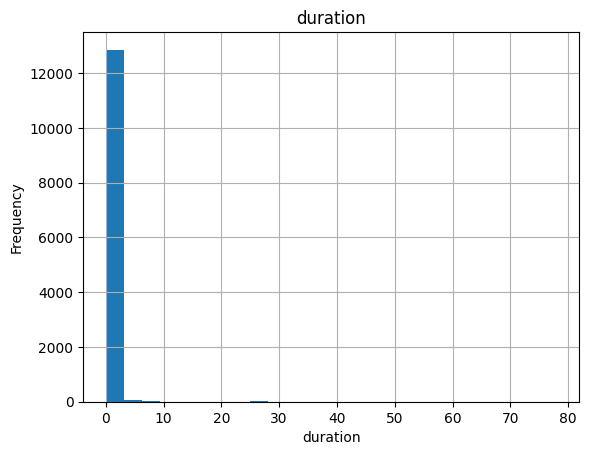

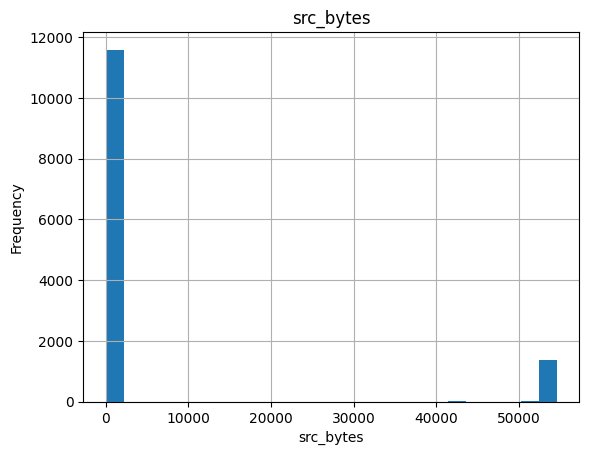

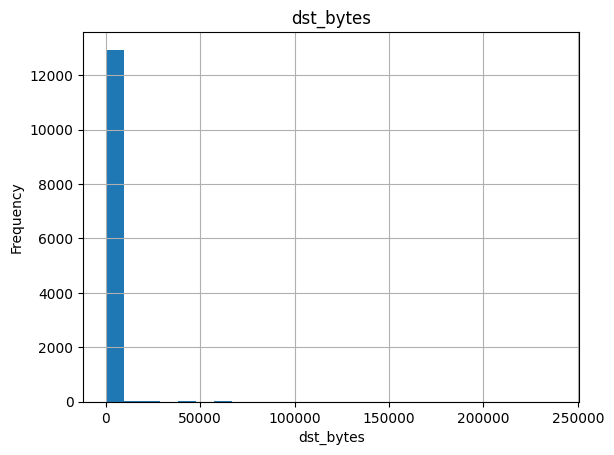

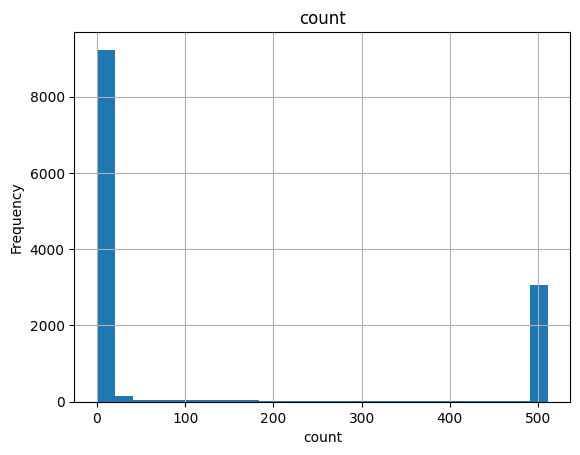

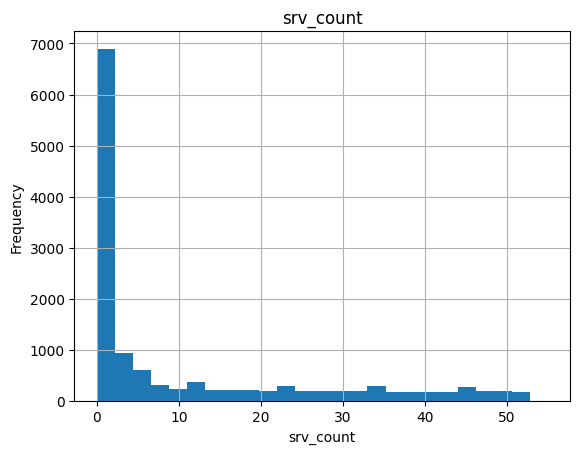

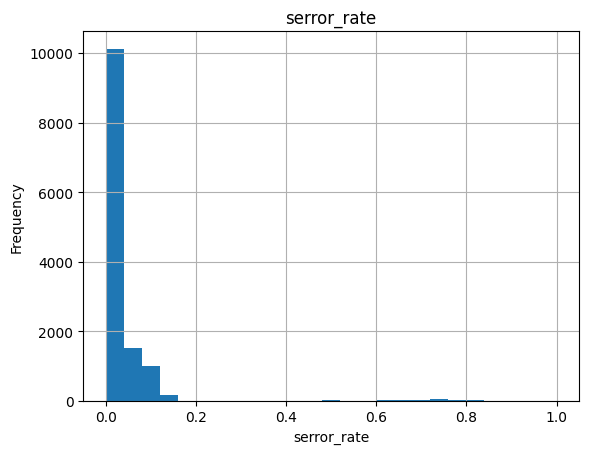

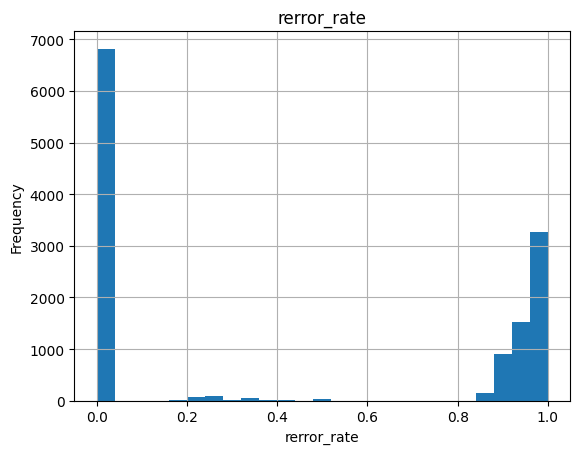

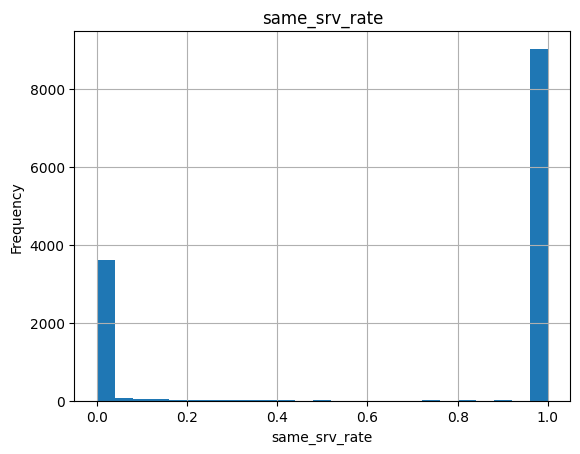

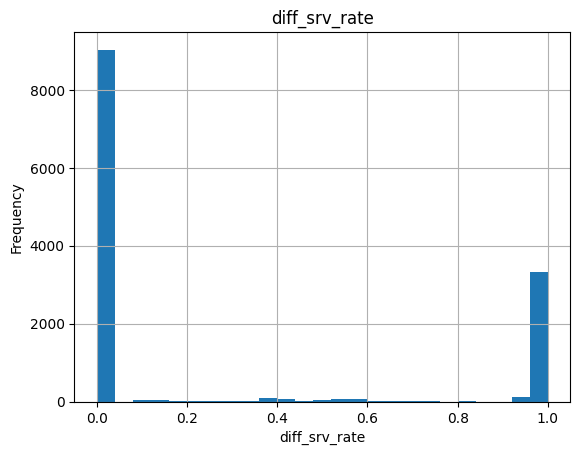

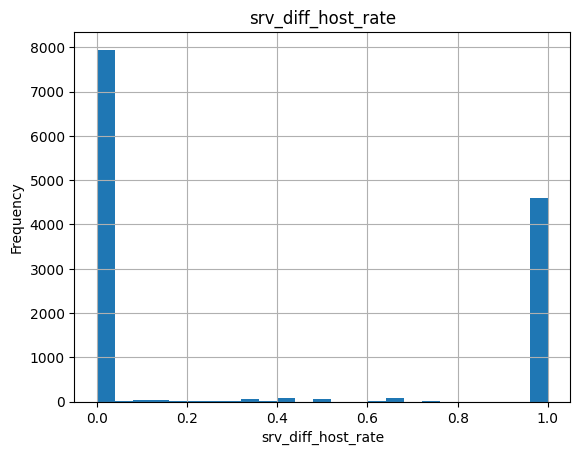

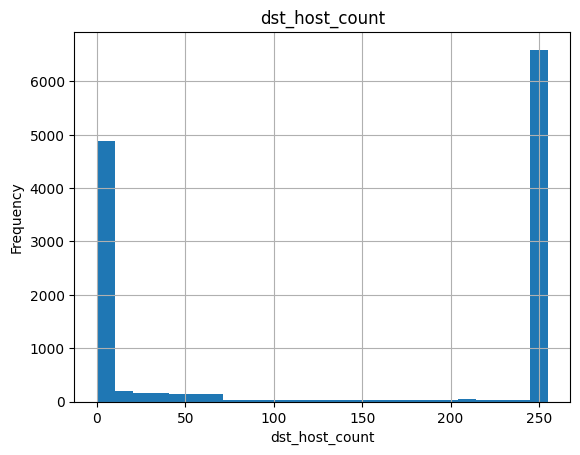

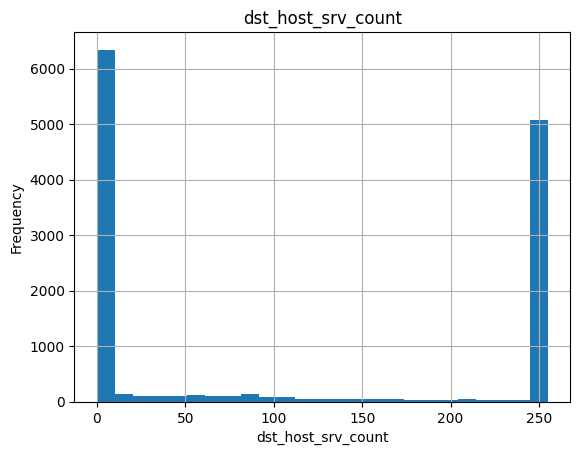

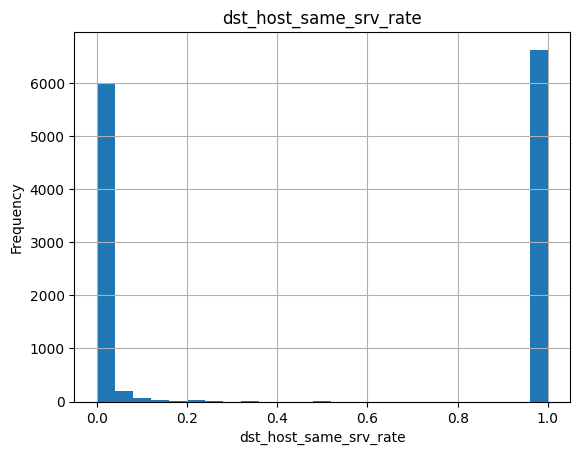

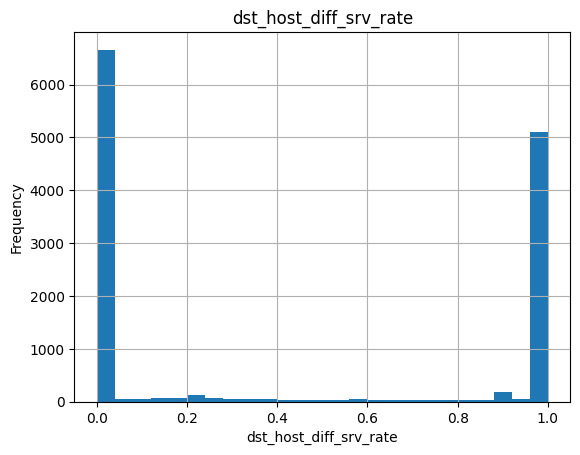

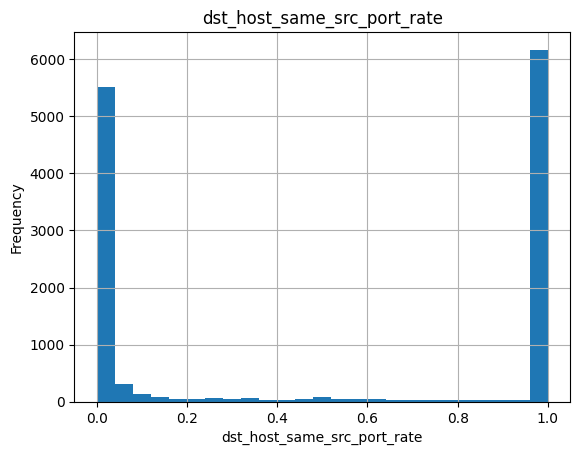

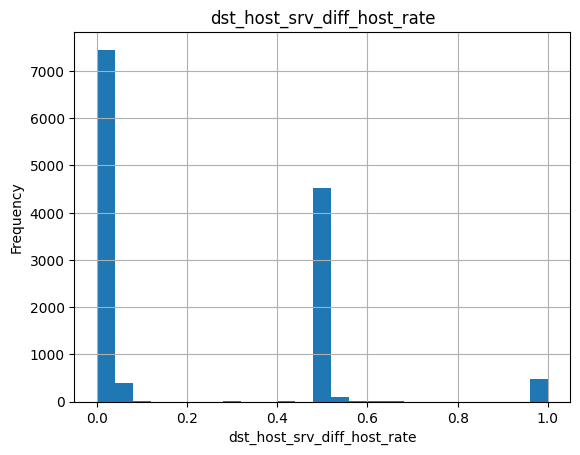

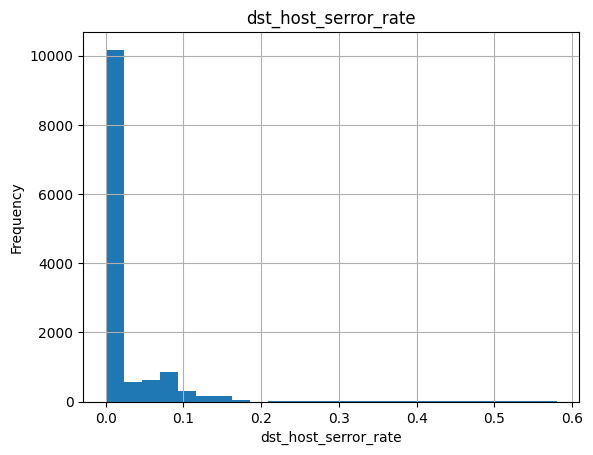

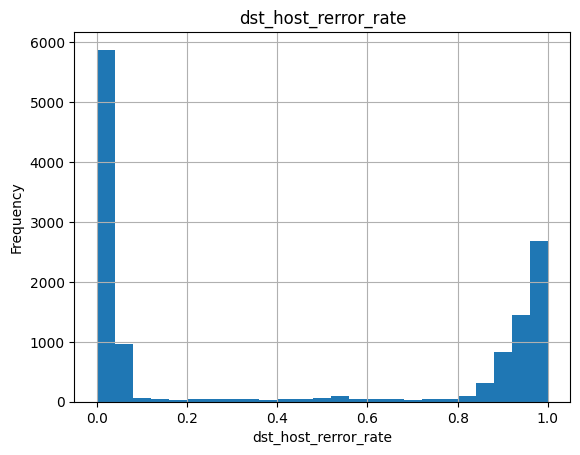

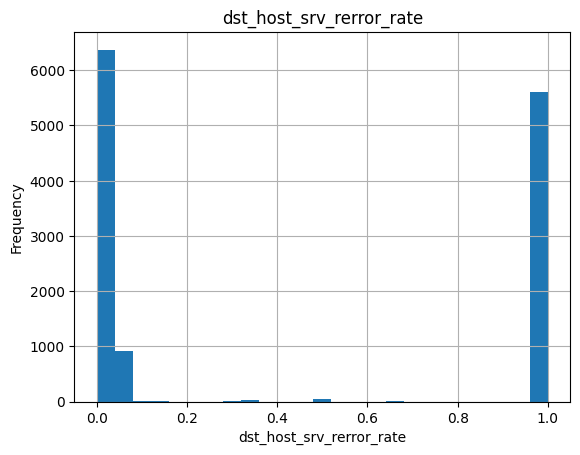

In [24]:
for feature in features_cont:
    data = file_data.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(feature)
    plt.show()

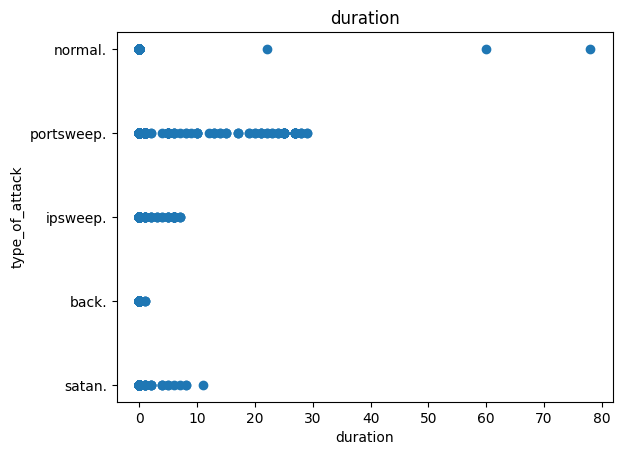

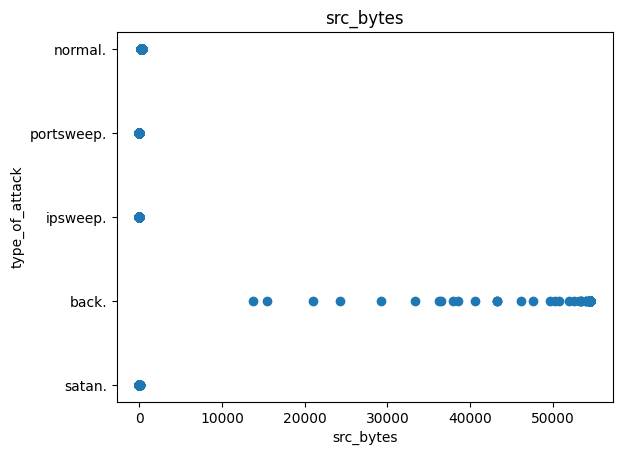

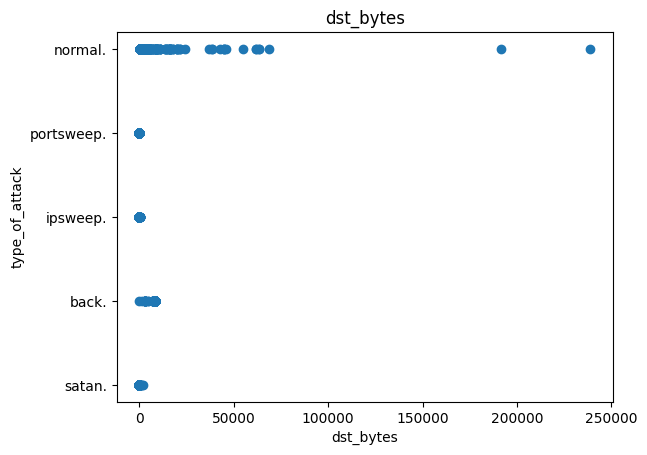

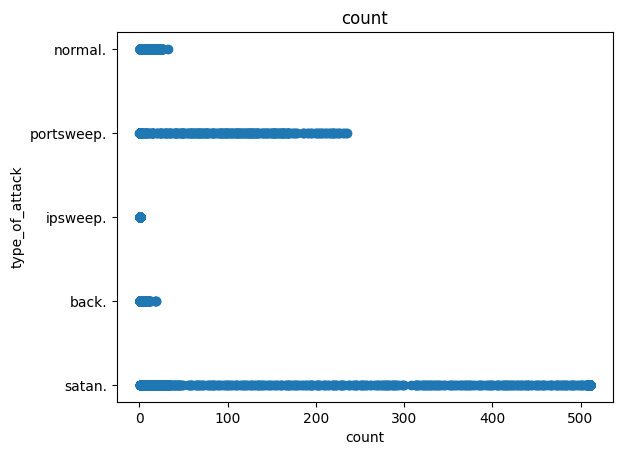

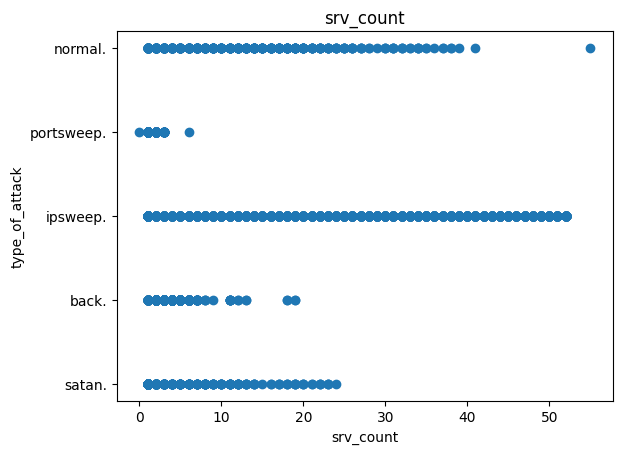

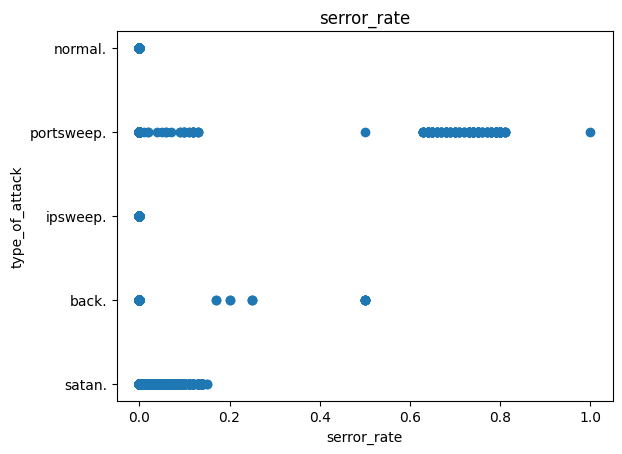

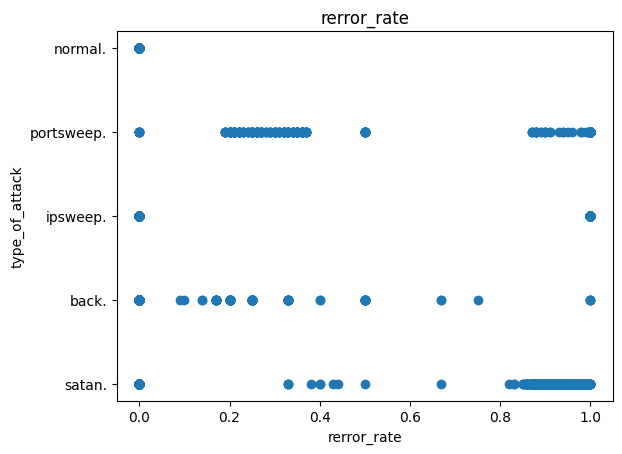

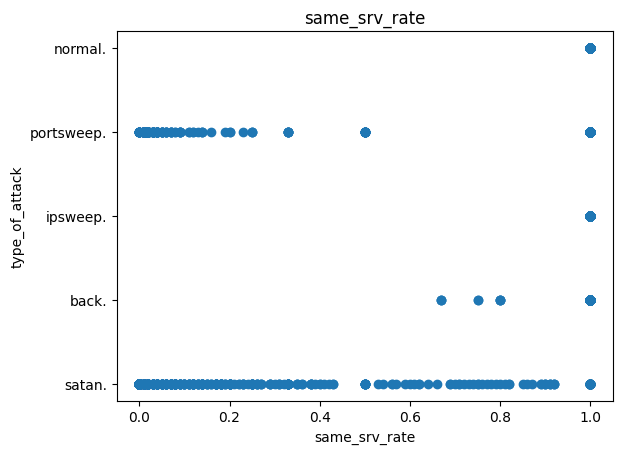

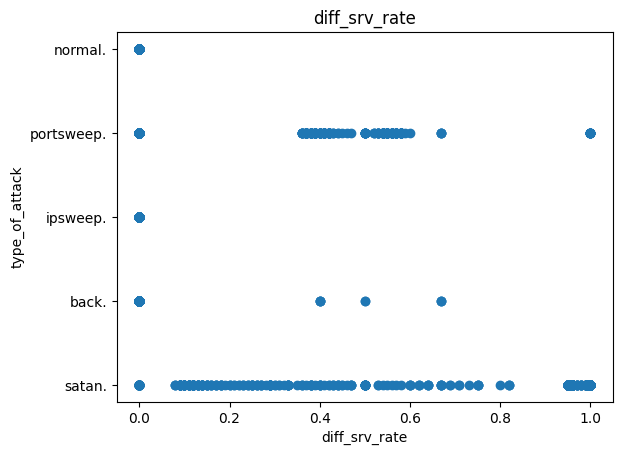

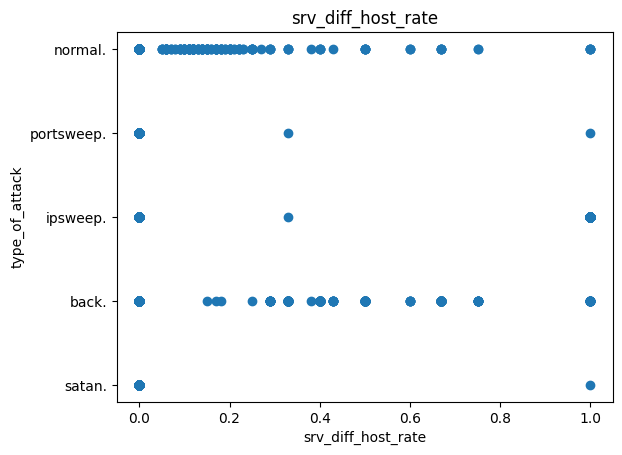

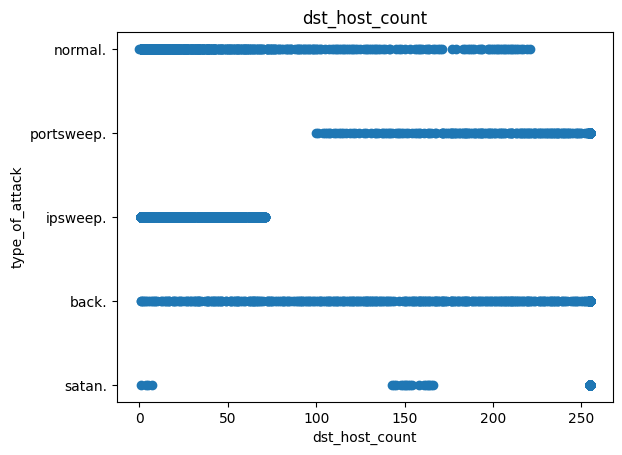

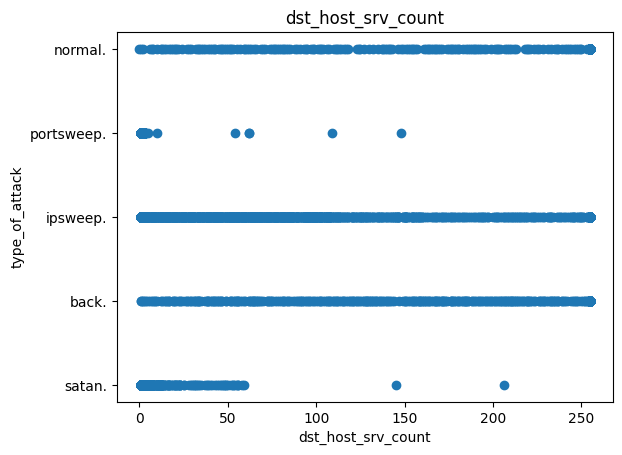

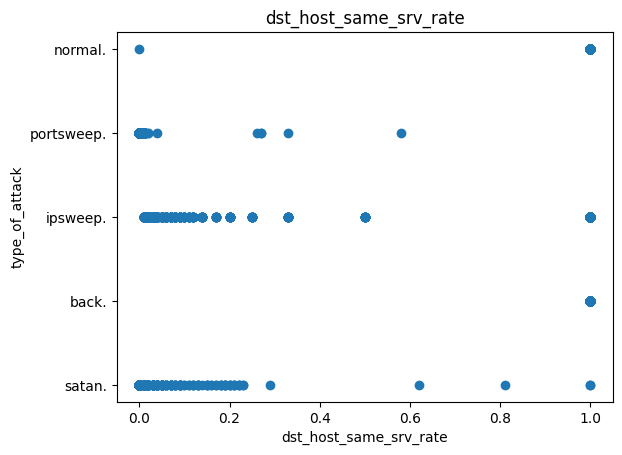

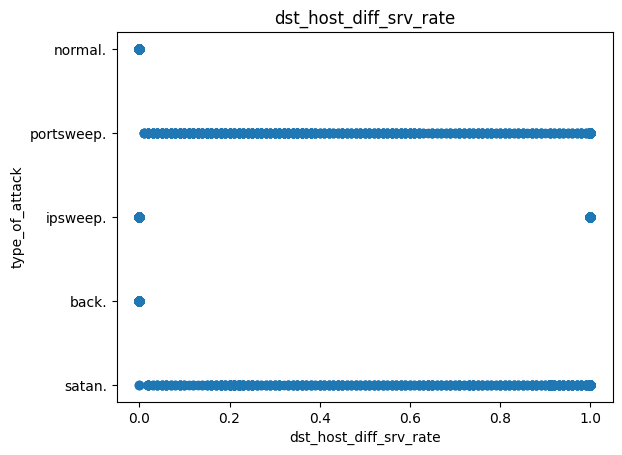

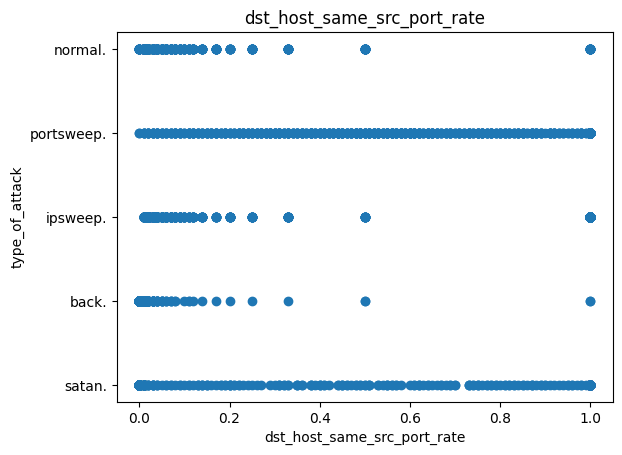

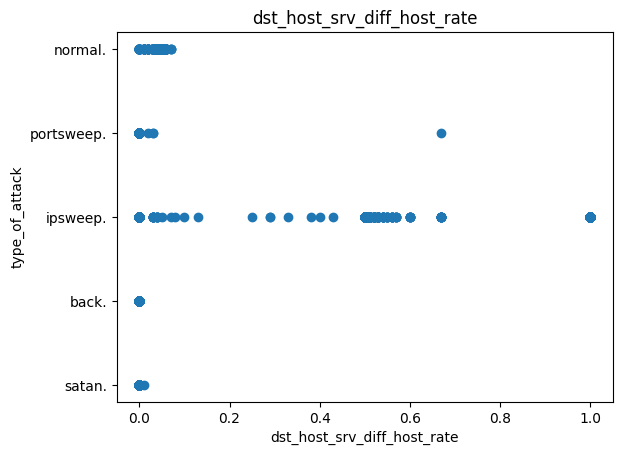

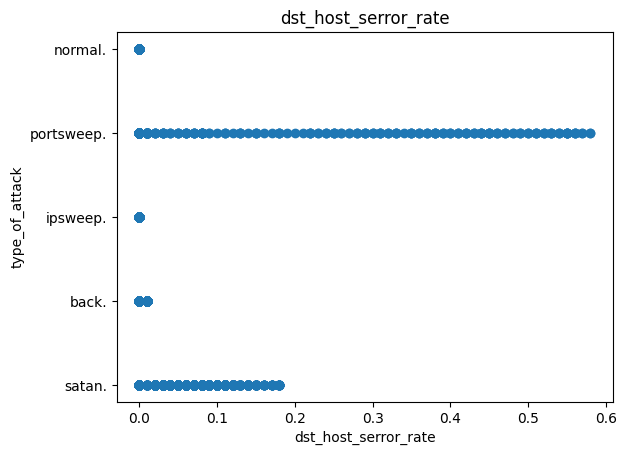

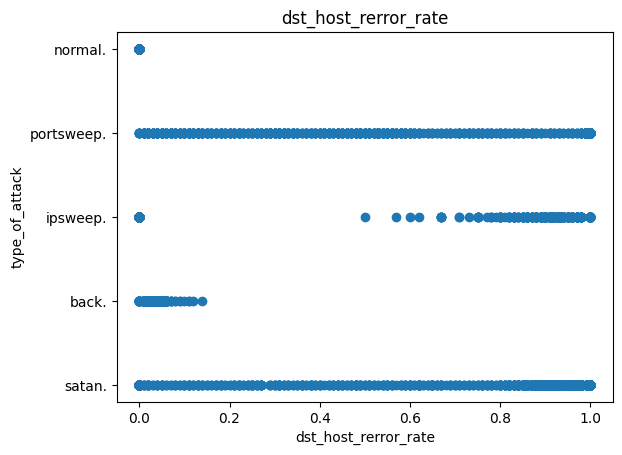

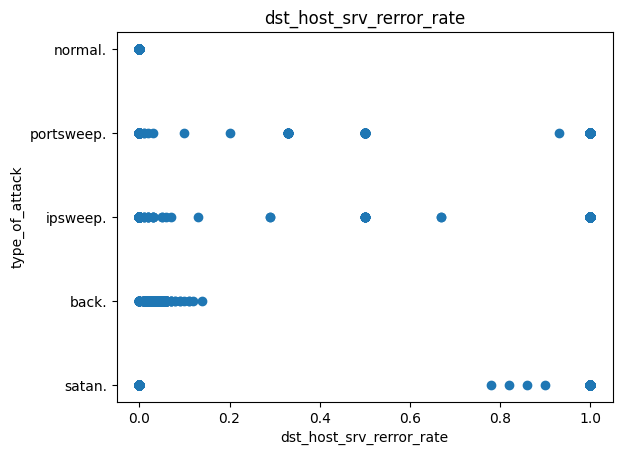

In [25]:
for feature in features_cont:
    plt.scatter(file_data[feature], file_data['type_of_attack'])
    plt.ylabel('type_of_attack')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()
    

In [36]:
# ONE-HOT ENCODING

data_onehot = file_data.copy()
for feature in features_cat:
    if (feature == 'type_of_attack'):
        continue
    data_onehot = pd.get_dummies(data_onehot, columns=[feature], prefix=feature, drop_first=True)
    
print(data_onehot.shape)

(12989, 109)


In [37]:
# DROPPING FEATURES HAVING VARIANCE = 0.0

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
var_thres = VarianceThreshold(threshold=0.0)
y = data_onehot['type_of_attack'].to_numpy()
X = data_onehot.drop('type_of_attack', axis = 1)
var_thres.fit(X)
const_columns = [column for column in X.columns if column not in X.columns[var_thres.get_support()]]
print(const_columns)
print(X.shape)
X = X.drop(const_columns, axis = 1)
print(X.shape)

['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted', 'num_file_creations', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
(12989, 108)
(12989, 98)


<Axes: >

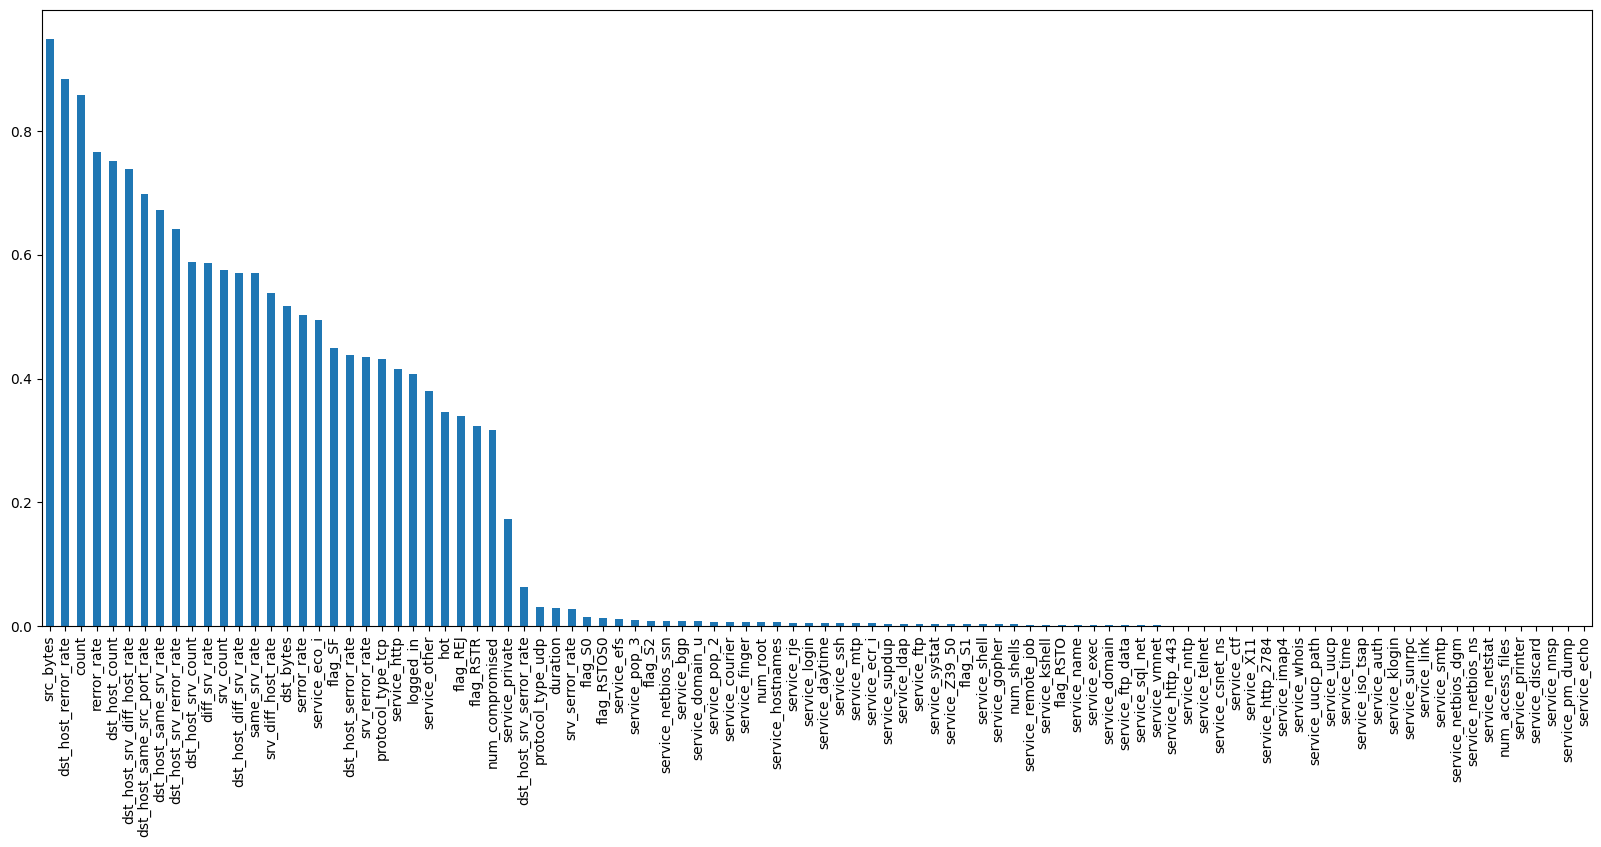

In [38]:
# DROPPING FEATURES HAVING MUTUAL_INFO = 0.0

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize = (20, 8))


In [41]:
zero_mi_features = mutual_info[mutual_info == 0].index
print(X.shape)
X = X.drop(columns = zero_mi_features)
print(X.shape)

(12989, 72)


KeyError: "['num_access_files', 'service_X11', 'service_auth', 'service_csnet_ns', 'service_ctf', 'service_discard', 'service_echo', 'service_http_2784', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_link', 'service_netbios_dgm', 'service_netbios_ns', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_pm_dump', 'service_printer', 'service_smtp', 'service_sunrpc', 'service_telnet', 'service_time', 'service_uucp', 'service_uucp_path', 'service_whois'] not found in axis"

In [ ]:
# DELIVERABLES: mutual_info, const_columns, features_cat (for ONE-HOT ENCODING)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score


y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9996150885296382
              precision    recall  f1-score   support

       back.       1.00      1.00      1.00       268
    ipsweep.       1.00      1.00      1.00      1088
     normal.       1.00      1.00      1.00       122
  portsweep.       1.00      1.00      1.00       410
      satan.       1.00      1.00      1.00       710

    accuracy                           1.00      2598
   macro avg       1.00      1.00      1.00      2598
weighted avg       1.00      1.00      1.00      2598



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
n_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

input_dim = X_train.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

yp = model.predict(X_test)
yp_classes = np.argmax(yp, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_classes, yp_classes):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_classes, yp_classes))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
